In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from process_score_calculator import  prepare_calculations as calculate_scores
from performance_analyzer import perform_analysis as analyze_performance

import warnings
warnings.filterwarnings("ignore")


In [2]:

scores_data = calculate_scores(MAC=True, DataName="BPIC_2019", layer="General_Process_Standards", index='case_id')

In [3]:
data = scores_data.data
data.head(2)

,eventID,cat_dim_5,cat_dim_4,cat_dim_3,cat_dim_2,case_Purchasing_Document,case_Purch._Doc._Category_name,cat_dim_8,cat_dim_6,cat_dim_7,...,timestamp,case:concept:name,concept:name,time:timestamp,score_found_case_id,score_sequential_case_id,score_equilibrium_case_id,score_singular_case_id,score_exclusion_case_id,mean_score
0,536870912000,Marketing,companyID_0000,EC Purchase order,Digital Marketing,2000000100,Purchase order,vendorID_0053,Service,"3-way match, invoice after GR",...,2017-01-31 23:59:00+00:00,2000000100_00001,Vendor creates invoice,2017-01-31 23:59:00+00:00,0.001112,0.0,0.000548,0.0,0.000894,0.000511
1,536870912001,Marketing,companyID_0000,EC Purchase order,Digital Marketing,2000000100,Purchase order,vendorID_0053,Service,"3-way match, invoice after GR",...,2017-05-25 23:59:00+00:00,2000000100_00001,Vendor creates invoice,2017-05-25 23:59:00+00:00,0.001112,0.0,0.000548,0.0,0.000894,0.000511


In [4]:
#score columns begin with score_
score_columns = [col for col in data.columns if 'score_' in col]
category_columns = [col for col in data.columns if 'category_' in col]
numeric_columns = [col for col in data.columns if 'num_' in col]

#create a Dataframe with only the score columns and case_id as index
scores = data[score_columns+['case_id']].set_index('case_id', drop=True)
scores.head(2)

,score_found_case_id,score_sequential_case_id,score_equilibrium_case_id,score_singular_case_id,score_exclusion_case_id
case_id,,,,,
2000000100_00001,0.001112,0.0,0.000548,0.0,0.000894
2000000100_00001,0.001112,0.0,0.000548,0.0,0.000894


In [5]:
#group by cat_dim_2 and sum all the columns beginning with "score_"
data_grouped = data.groupby("cat_dim_5").agg({col: 'sum' for col in data.columns if col.startswith("score_")})
data_grouped.head(20)

,score_found_case_id,score_sequential_case_id,score_equilibrium_case_id,score_singular_case_id,score_exclusion_case_id
cat_dim_5,,,,,
Additives,0.388383,0.447255,0.400310,0.385714,0.374364
CAPEX & SOCS,0.149517,0.157384,0.147398,0.142132,0.138646
Commodity Resins,0.016883,0.020445,0.018392,0.018674,0.017929
Energy,0.002779,0.018472,0.005482,0.010375,0.010151
Enterprise Services,0.011394,0.011692,0.010350,0.019712,0.018829
Latex & Monomers,0.161467,0.179820,0.174150,0.128423,0.147539
Logistics,0.845967,0.550459,0.417152,0.461591,0.772488
Marketing,0.551518,0.031478,0.286126,0.035274,0.449103
Others,0.031543,0.037184,0.032342,0.038386,0.037405


In [6]:
#read the data from /Users/urszulajessen/code/gitHub/WISE/data/data_BPIC_2019/BPIC_2019.csv and filter it to only case_Item_Type == Service   
df = pd.read_csv("/Users/urszulajessen/code/gitHub/WISE/data/data_BPIC_2019/BPIC_2019.csv")
df = df[df["case_Item_Type"] == "Service"]
#save it to /Users/urszulajessen/code/gitHub/WISE/data/data_BPIC_2019_Service/BPIC_2019_Service.csv
df.to_csv("/Users/urszulajessen/code/gitHub/WISE/data/data_BPIC_2019_Service/BPIC_2019_Service.csv", index=False)


In [7]:
#read the data from /Users/urszulajessen/code/gitHub/WISE/data/data_BPIC_2019/BPIC_2019.csv and get 50 random case_id
import pandas as pd
df_sample = pd.read_csv("/Users/urszulajessen/code/gitHub/WISE/data/data_BPIC_2019/BPIC_2019.csv")
random_case_id = df_sample["case_concept_name"].sample(n=50)
df_sample = df_sample[df_sample["case_concept_name"].isin(random_case_id)]
#save it to /Users/urszulajessen/code/gitHub/WISE/data/data_BPIC_2019_Service/BPIC_2019_Service.csv
df_sample.to_csv("/Users/urszulajessen/code/gitHub/WISE/data/data_sample/sample.csv", index=False)
#example to describe the data and Domain Knowledge -' Create Purchase Order Item only 1x but Record Goods Receipt 117 x and Vendor creates invoice 21x and clear invoice 29x
df_sample[df_sample["case_concept_name"] == "2000000100_00001"]

,eventID,case_Spend_area_text,case_Company,case_Document_Type,case_Sub_spend_area_text,case_Purchasing_Document,case_Purch._Doc._Category_name,case_Vendor,case_Item_Type,case_Item_Category,...,event_User,event_org_resource,event_concept_name,event_Cumulative_net_worth_(EUR),event_time_timestamp,@@index,@@case_index,case:concept:name,concept:name,time:timestamp
0,536870912000,Marketing,companyID_0000,EC Purchase order,Digital Marketing,2000000100,Purchase order,vendorID_0053,Service,"3-way match, invoice after GR",...,NONE,NONE,Vendor creates invoice,7815013.0,2017-01-31 23:59:00+00:00,0,0,2000000100_00001,Vendor creates invoice,2017-01-31 23:59:00+00:00
1,536870912001,Marketing,companyID_0000,EC Purchase order,Digital Marketing,2000000100,Purchase order,vendorID_0053,Service,"3-way match, invoice after GR",...,NONE,NONE,Vendor creates invoice,7815013.0,2017-05-25 23:59:00+00:00,1,0,2000000100_00001,Vendor creates invoice,2017-05-25 23:59:00+00:00
2,536870912209,Marketing,companyID_0000,EC Purchase order,Digital Marketing,2000000100,Purchase order,vendorID_0053,Service,"3-way match, invoice after GR",...,user_012,user_012,Record Invoice Receipt,7815013.0,2018-01-08 15:29:00+00:00,2,0,2000000100_00001,Record Invoice Receipt,2018-01-08 15:29:00+00:00
3,536870912296,Marketing,companyID_0000,EC Purchase order,Digital Marketing,2000000100,Purchase order,vendorID_0053,Service,"3-way match, invoice after GR",...,user_013,user_013,Record Invoice Receipt,7815013.0,2018-01-10 14:28:00+00:00,3,0,2000000100_00001,Record Invoice Receipt,2018-01-10 14:28:00+00:00
4,536870912297,Marketing,companyID_0000,EC Purchase order,Digital Marketing,2000000100,Purchase order,vendorID_0053,Service,"3-way match, invoice after GR",...,user_015,user_015,Cancel Invoice Receipt,7815013.0,2018-01-10 16:16:00+00:00,4,0,2000000100_00001,Cancel Invoice Receipt,2018-01-10 16:16:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,536870912457,Marketing,companyID_0000,EC Purchase order,Digital Marketing,2000000100,Purchase order,vendorID_0053,Service,"3-way match, invoice after GR",...,user_020,user_020,Record Invoice Receipt,7815013.0,2019-04-01 08:02:00+00:00,459,0,2000000100_00001,Record Invoice Receipt,2019-04-01 08:02:00+00:00
460,536870912458,Marketing,companyID_0000,EC Purchase order,Digital Marketing,2000000100,Purchase order,vendorID_0053,Service,"3-way match, invoice after GR",...,user_013,user_013,Record Invoice Receipt,7815013.0,2019-04-01 10:52:00+00:00,460,0,2000000100_00001,Record Invoice Receipt,2019-04-01 10:52:00+00:00
461,536870912459,Marketing,companyID_0000,EC Purchase order,Digital Marketing,2000000100,Purchase order,vendorID_0053,Service,"3-way match, invoice after GR",...,user_013,user_013,Record Invoice Receipt,7815013.0,2019-04-01 13:29:00+00:00,461,0,2000000100_00001,Record Invoice Receipt,2019-04-01 13:29:00+00:00
462,536870912463,Marketing,companyID_0000,EC Purchase order,Digital Marketing,2000000100,Purchase order,vendorID_0053,Service,"3-way match, invoice after GR",...,NONE,NONE,Vendor creates debit memo,7815013.0,2019-04-30 23:59:00+00:00,462,0,2000000100_00001,Vendor creates debit memo,2019-04-30 23:59:00+00:00


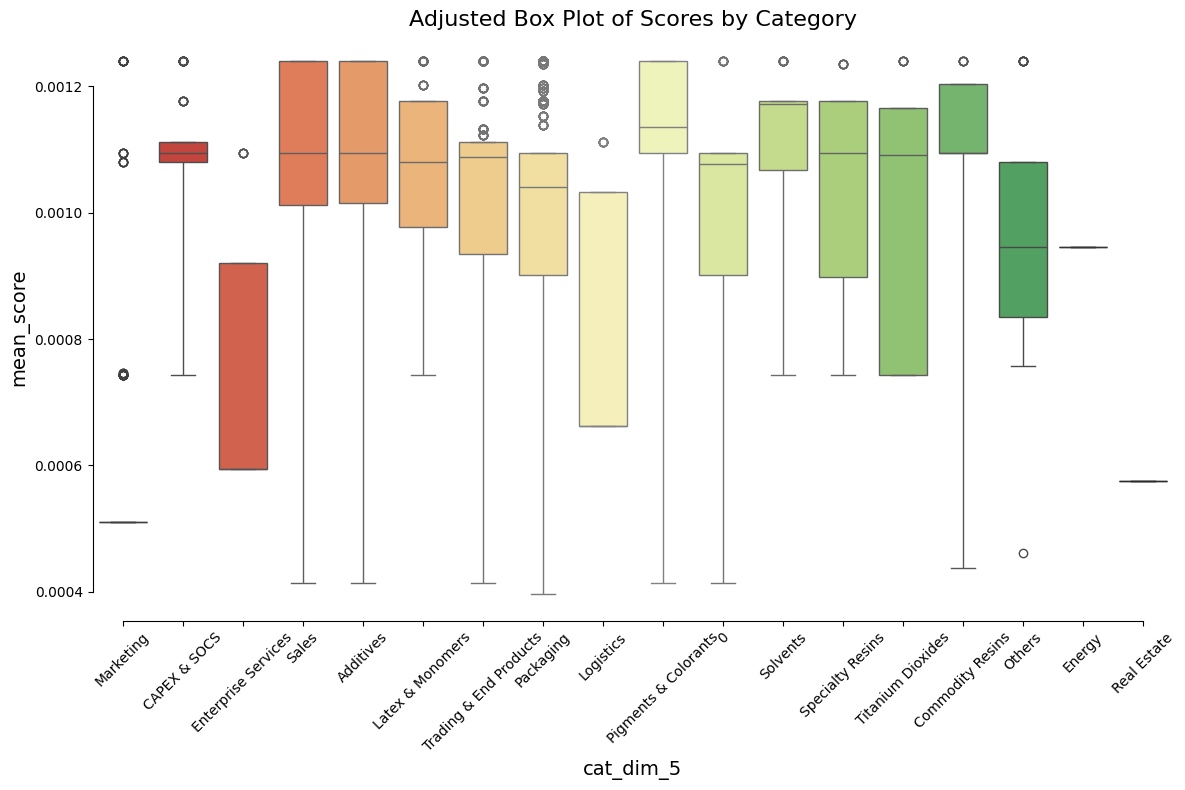

In [8]:
analyze_performance(visualize=True, category='cat_dim_5', score='mean_score')

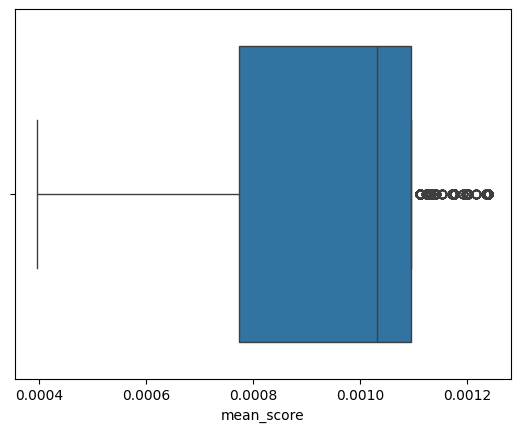

,eventID,cat_dim_5,cat_dim_4,cat_dim_3,cat_dim_2,case_Purchasing_Document,case_Purch._Doc._Category_name,cat_dim_8,cat_dim_6,cat_dim_7,...,timestamp,case:concept:name,concept:name,time:timestamp,score_found_case_id,score_sequential_case_id,score_equilibrium_case_id,score_singular_case_id,score_exclusion_case_id,mean_score
705,36863704301568,Sales,companyID_0000,Standard PO,Products for Resale,4507002771,Purchase order,vendorID_0108,Standard,"3-way match, invoice before GR",...,2018-01-15 07:47:00+00:00,4507002771_00090,Create Purchase Order Item,2018-01-15 07:47:00+00:00,0.001112,0.001847,0.00119,0.001037,0.001015,0.00124
706,36863704301569,Sales,companyID_0000,Standard PO,Products for Resale,4507002771,Purchase order,vendorID_0108,Standard,"3-way match, invoice before GR",...,2018-01-16 23:59:00+00:00,4507002771_00090,Vendor creates invoice,2018-01-16 23:59:00+00:00,0.001112,0.001847,0.00119,0.001037,0.001015,0.00124
707,36863704301570,Sales,companyID_0000,Standard PO,Products for Resale,4507002771,Purchase order,vendorID_0108,Standard,"3-way match, invoice before GR",...,2018-01-18 17:37:00+00:00,4507002771_00090,Record Goods Receipt,2018-01-18 17:37:00+00:00,0.001112,0.001847,0.00119,0.001037,0.001015,0.00124
708,36863704301571,Sales,companyID_0000,Standard PO,Products for Resale,4507002771,Purchase order,vendorID_0108,Standard,"3-way match, invoice before GR",...,2018-01-19 13:29:00+00:00,4507002771_00090,Record Invoice Receipt,2018-01-19 13:29:00+00:00,0.001112,0.001847,0.00119,0.001037,0.001015,0.00124
709,36863704301572,Sales,companyID_0000,Standard PO,Products for Resale,4507002771,Purchase order,vendorID_0108,Standard,"3-way match, invoice before GR",...,2018-02-22 16:15:00+00:00,4507002771_00090,Clear Invoice,2018-02-22 16:15:00+00:00,0.001112,0.001847,0.00119,0.001037,0.001015,0.00124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6483,1054070873784322,Sales,companyID_0000,Standard PO,Products for Resale,4508074212,Purchase order,vendorID_0114,Standard,"3-way match, invoice before GR",...,2018-12-14 23:59:00+00:00,4508074212_00150,Vendor creates invoice,2018-12-14 23:59:00+00:00,0.001112,0.001847,0.00119,0.001037,0.001015,0.00124
6484,1054070873784323,Sales,companyID_0000,Standard PO,Products for Resale,4508074212,Purchase order,vendorID_0114,Standard,"3-way match, invoice before GR",...,2018-12-17 13:35:00+00:00,4508074212_00150,Record Invoice Receipt,2018-12-17 13:35:00+00:00,0.001112,0.001847,0.00119,0.001037,0.001015,0.00124
6485,1054070873784324,Sales,companyID_0000,Standard PO,Products for Resale,4508074212,Purchase order,vendorID_0114,Standard,"3-way match, invoice before GR",...,2018-12-18 17:38:00+00:00,4508074212_00150,Record Goods Receipt,2018-12-18 17:38:00+00:00,0.001112,0.001847,0.00119,0.001037,0.001015,0.00124
6486,1054070873784325,Sales,companyID_0000,Standard PO,Products for Resale,4508074212,Purchase order,vendorID_0114,Standard,"3-way match, invoice before GR",...,2018-12-19 02:20:00+00:00,4508074212_00150,Remove Payment Block,2018-12-19 02:20:00+00:00,0.001112,0.001847,0.00119,0.001037,0.001015,0.00124


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

def calculate_outliers(data, method='standard'):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1

    if method == 'adjusted':
        y = np.asarray(data, dtype=np.double)
        mc = sm.stats.stattools.medcouple(y)
        if mc > 0:
            lower_bound = q1 - 1.5 * np.exp(-4 * mc) * iqr
            upper_bound = q3 + 1.5 * np.exp(3 * mc) * iqr
        else:
            lower_bound = q1 - 1.5 * np.exp(-3 * mc) * iqr
            upper_bound = q3 + 1.5 * np.exp(4 * mc) * iqr
    else:  # standard boxplot
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

    whis = np.interp([lower_bound, upper_bound], np.sort(data), np.linspace(0, 1, data.size)) * 100
    return lower_bound, upper_bound, whis

def plot_custom_boxplot(data, score_column_name, category_column, method='standard', title=None):
    plt.figure(figsize=(12, 8))
    categories = data[category_column].unique()
    n_categories = len(categories)
    colors = sns.color_palette("RdYlGn", n_categories)

    for i, category in enumerate(categories):
        category_data = data[data[category_column] == category][score_column_name]
        if not category_data.empty:
            lower_bound, upper_bound, whis = calculate_outliers(category_data, method=method)
            sns.boxplot(data=category_data, whis=whis/100, color=colors[i])

    plt.xticks(range(n_categories), categories, rotation=45)
    plt.title(title if title else f'Custom Box Plot of {score_column_name} by {category_column}', fontsize=16)
    plt.xlabel(category_column, fontsize=14)
    plt.ylabel(score_column_name, fontsize=14)
    sns.despine(trim=True)
    plt.tight_layout()
    plt.show()

def select_outliers_adjusted_boxplot(df, col_name, method='standard', show_plot=False):
    lower_bound, upper_bound, whis = calculate_outliers(df[col_name], method=method)
    outliers = df[(df[col_name] < lower_bound) | (df[col_name] > upper_bound)]
    if show_plot:
        sns.boxplot(x=df[col_name], whis=whis/100)
        plt.show()
    return outliers



select_outliers_adjusted_boxplot(data, 'mean_score', method='adjusted', show_plot=True)


In [10]:
data.head(2)

,eventID,cat_dim_5,cat_dim_4,cat_dim_3,cat_dim_2,case_Purchasing_Document,case_Purch._Doc._Category_name,cat_dim_8,cat_dim_6,cat_dim_7,...,timestamp,case:concept:name,concept:name,time:timestamp,score_found_case_id,score_sequential_case_id,score_equilibrium_case_id,score_singular_case_id,score_exclusion_case_id,mean_score
0,536870912000,Marketing,companyID_0000,EC Purchase order,Digital Marketing,2000000100,Purchase order,vendorID_0053,Service,"3-way match, invoice after GR",...,2017-01-31 23:59:00+00:00,2000000100_00001,Vendor creates invoice,2017-01-31 23:59:00+00:00,0.001112,0.0,0.000548,0.0,0.000894,0.000511
1,536870912001,Marketing,companyID_0000,EC Purchase order,Digital Marketing,2000000100,Purchase order,vendorID_0053,Service,"3-way match, invoice after GR",...,2017-05-25 23:59:00+00:00,2000000100_00001,Vendor creates invoice,2017-05-25 23:59:00+00:00,0.001112,0.0,0.000548,0.0,0.000894,0.000511


In [11]:
category_column='cat_dim_2'
data[category_column].unique()
#group by category column and mean of mean_score, and count of case_id
data_grouped = data.groupby(category_column).agg({'mean_score': 'mean', 'case_id': 'count'}).rename(columns={'case_id': 'count_case_id'})
data_grouped.head(20)

,mean_score,count_case_id
cat_dim_2,,
Additives - Other,0.001194,13
Aliphatic Solvents,0.001054,19
Alkyd Resins,0.000972,26
Bags,0.001118,12
Biocides,0.000866,15
Business Gifts & Promotional Items,0.001101,36
Chloride,0.001017,21
Closures,0.001240,6
Color Collateral,0.001041,65


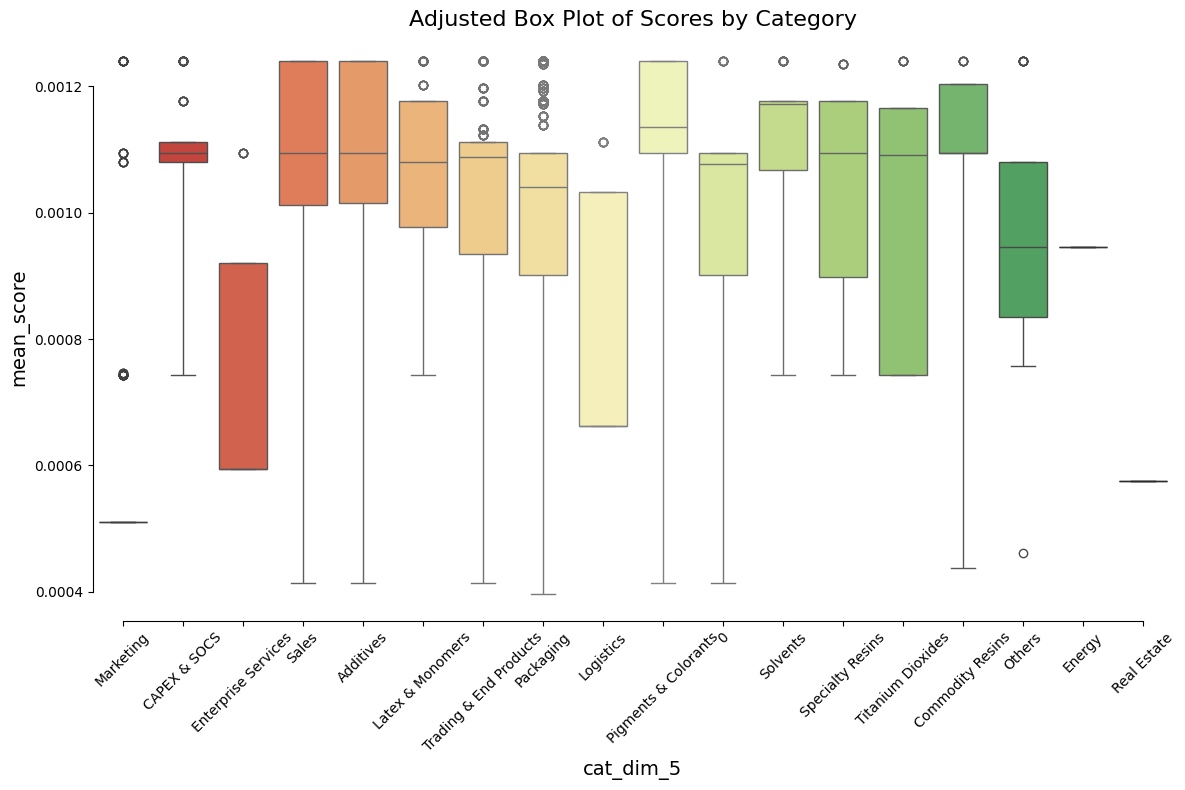

In [12]:
analyze_performance(visualize=True, category='cat_dim_5', score='mean_score', method='adjusted')

## Chat GPT Feedback (Chat GPT 4 Turbo called on 12.05.2024)

## Detailed Analysis Recommendations Based on Adjusted Box Plot of Scores by Category

### 1. Categories with High Variability
- **Focus Areas**: "Additives", "Logistics", and "Specialty Resins" show high variability in scores, as indicated by the length of their box plots and the presence of many outliers.
- **Action**: Investigate the factors causing this variability to understand inconsistencies in performance or measurement within these categories.

### 2. Low Score Categories
- **Focus Areas**: "Marketing" and "Enterprise Services" appear to have significantly lower median scores compared to other categories.
- **Action**: Dive deeper into these categories to determine the causes of these lower scores and identify potential areas for improvement.

### 3. Outlier Analysis
- **Focus Areas**: Categories such as "Additives", "Logistics", and "Pigments & Colorants" display a significant number of outliers above the upper whisker.
- **Action**: Analyzing these outliers could provide insights into exceptional cases or errors in data collection or processing.

### 4. Performance Trends and Patterns
- **Action**: Compare these categories against other dimensions (like time, geographical location, or specific business units) to reveal trends or patterns in performance. Analyzing temporal trends could show whether the performance is improving or deteriorating over time.

### 5. Cross-Category Analysis
- **Action**: Examine the relationships between categories to yield insights. Factors leading to high performance in "Commodity Resins" and "Energy" might be leveraged to improve performance in lower-scoring categories.

### 6. Detailed Statistical Analysis
- **Action**: Employ statistical tests to compare the means and variances of these categories or conduct regression analysis to understand the impact of various factors on the scores.

### 7. Qualitative Feedback
- **Action**: Integrate qualitative data, such as feedback from stakeholders in underperforming categories like "Marketing" and "Enterprise Services," to offer context to the numerical data, helping to pinpoint specific issues or opportunities for improvement.

---
By focusing on these areas, we can develop a more nuanced understanding of the factors influencing performance across different segments of the business, thereby informing targeted strategies for enhancement.


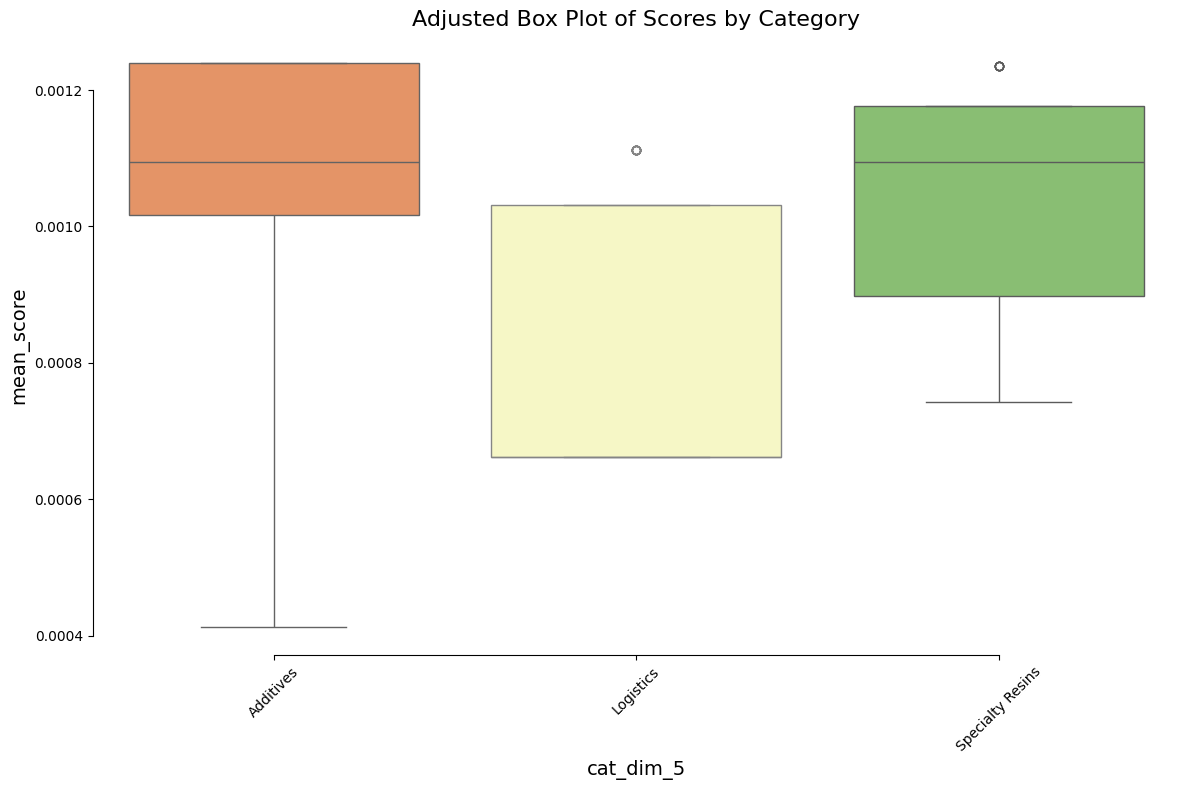

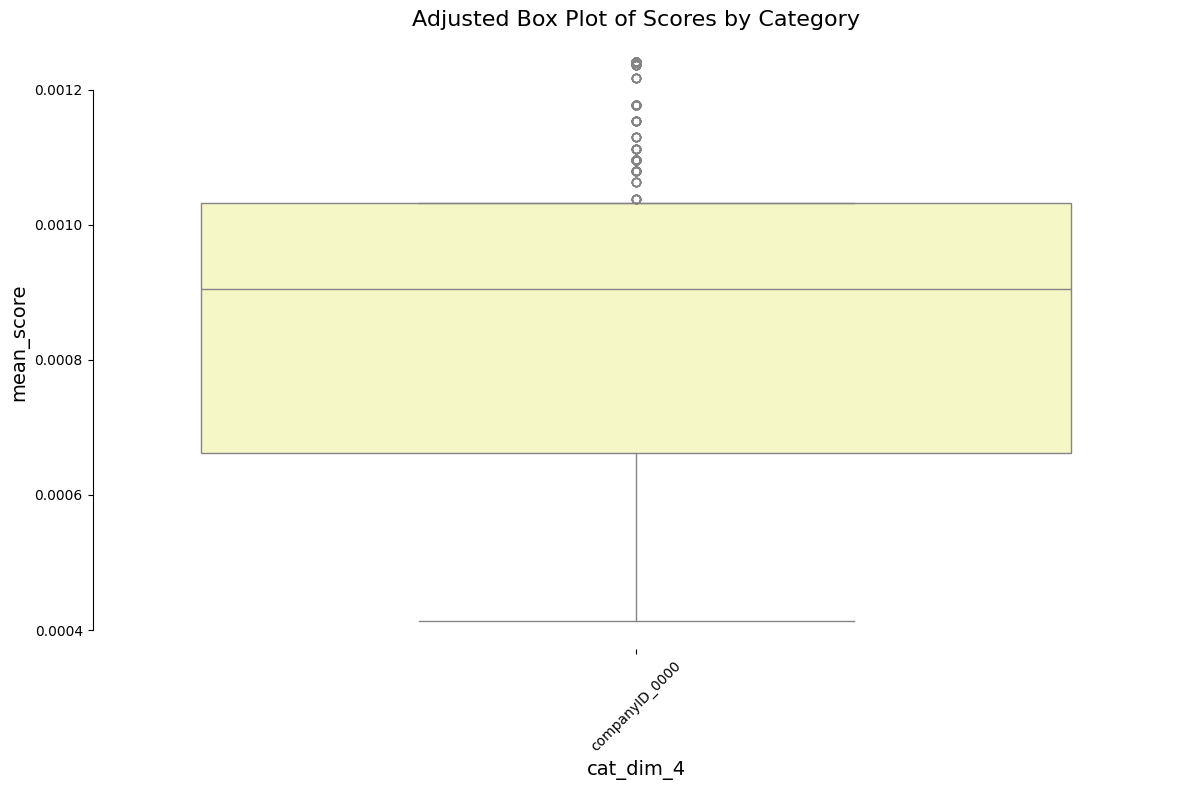

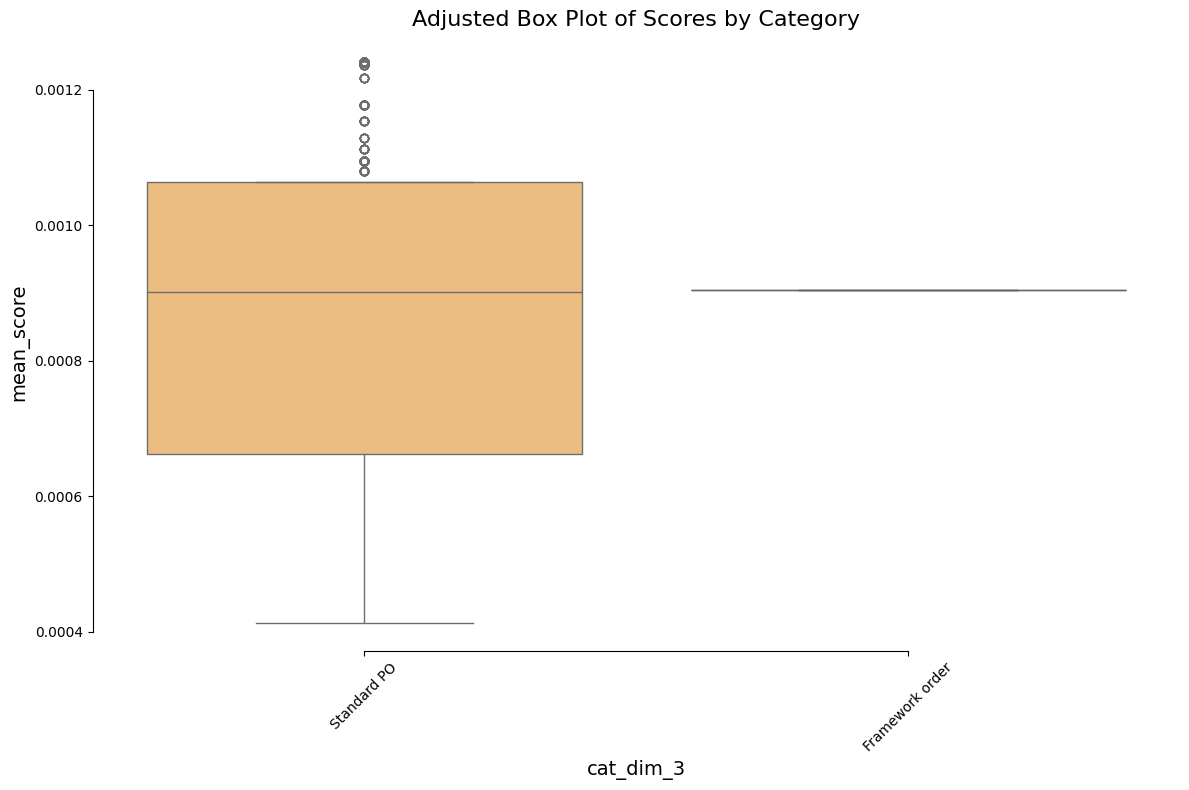

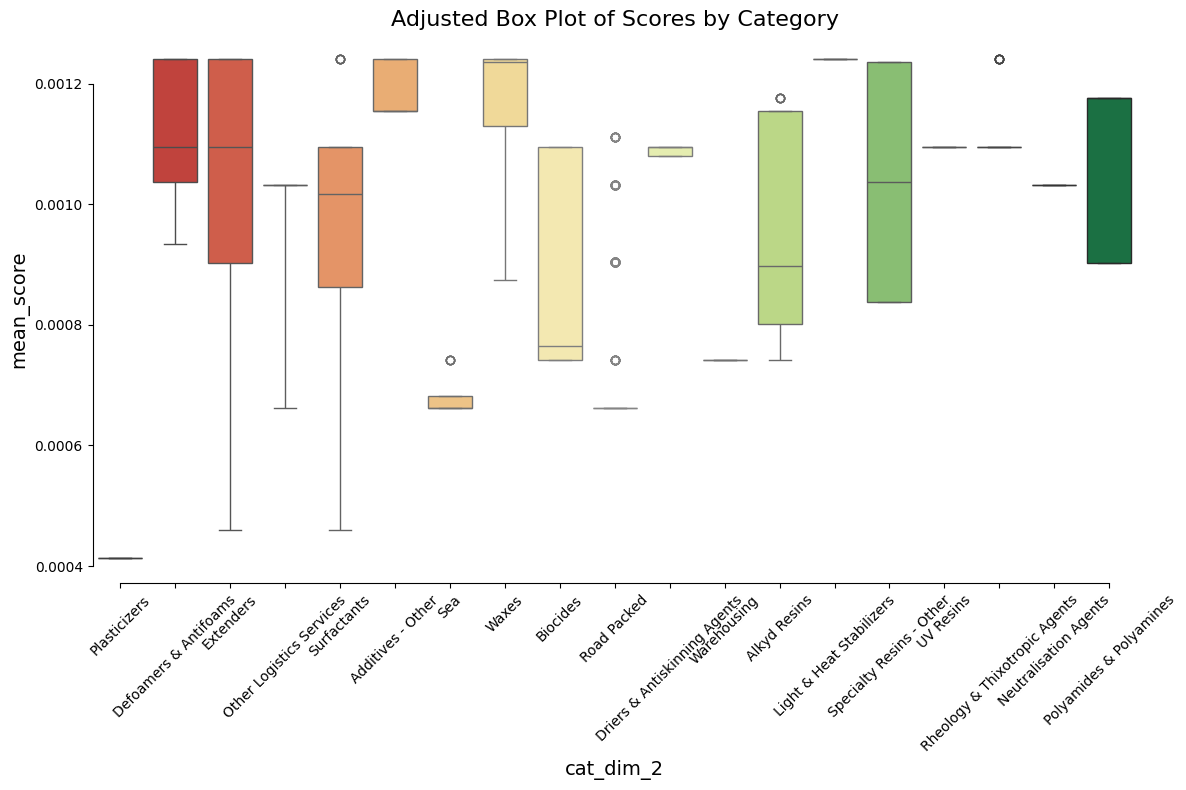

Error: y must be squeezable to a 1-d array for category cat_dim_8


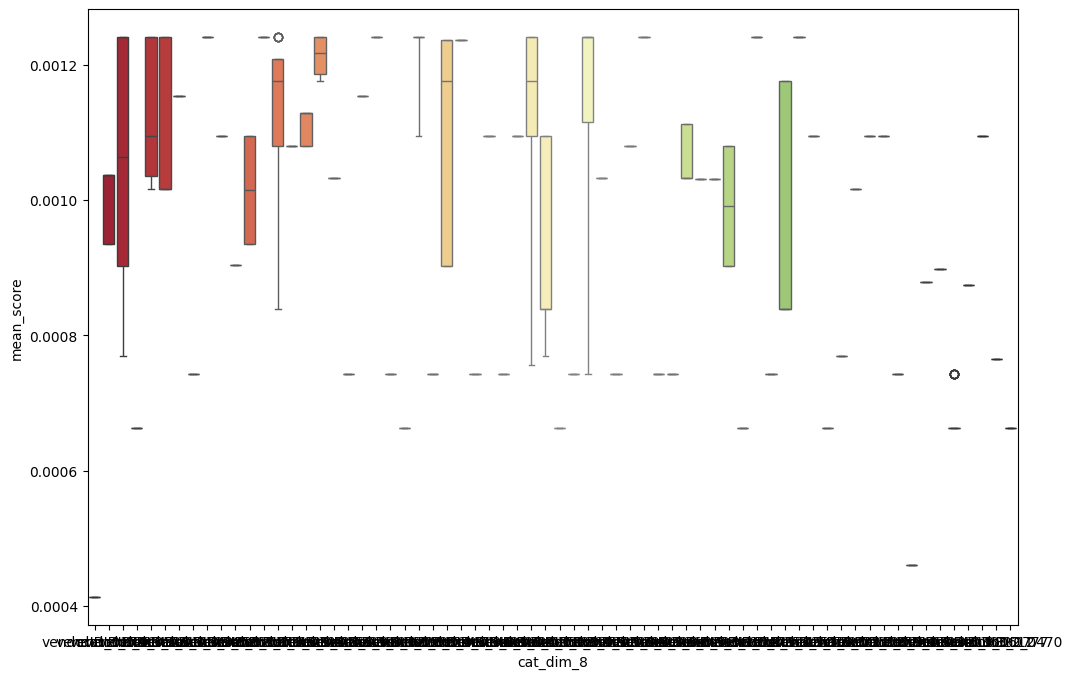

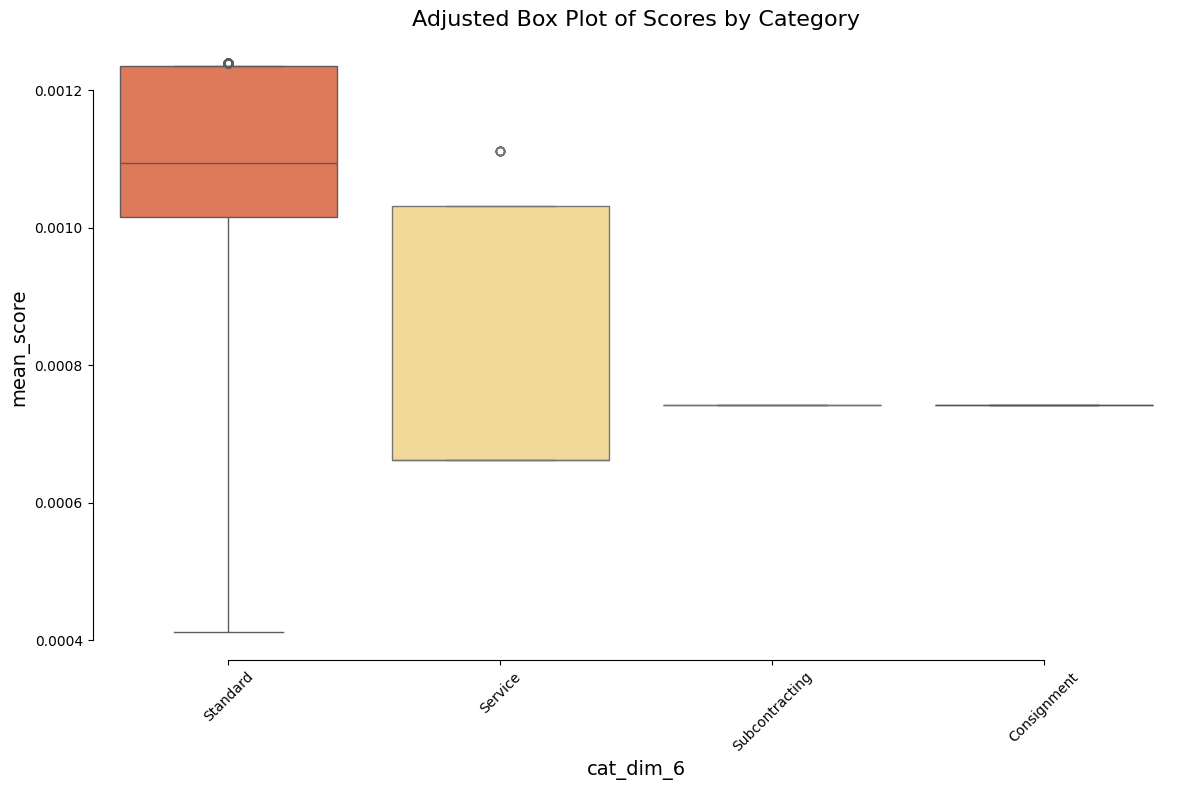

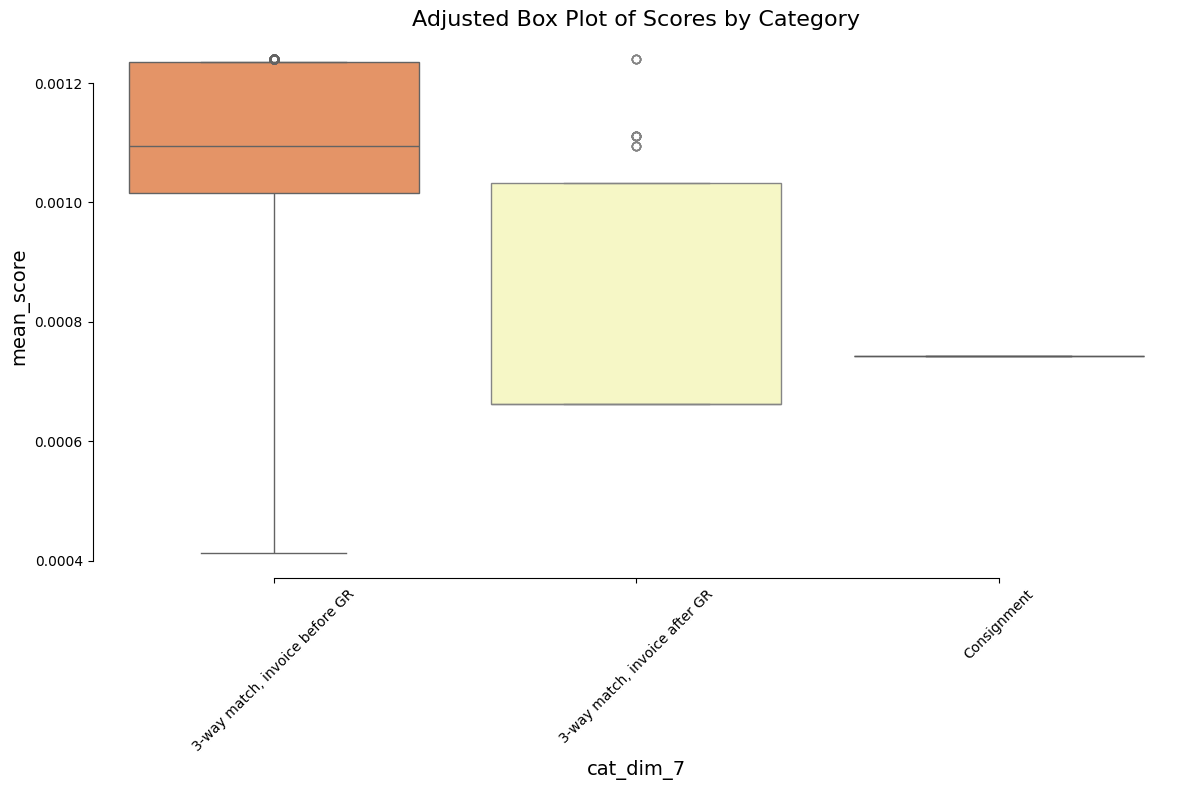

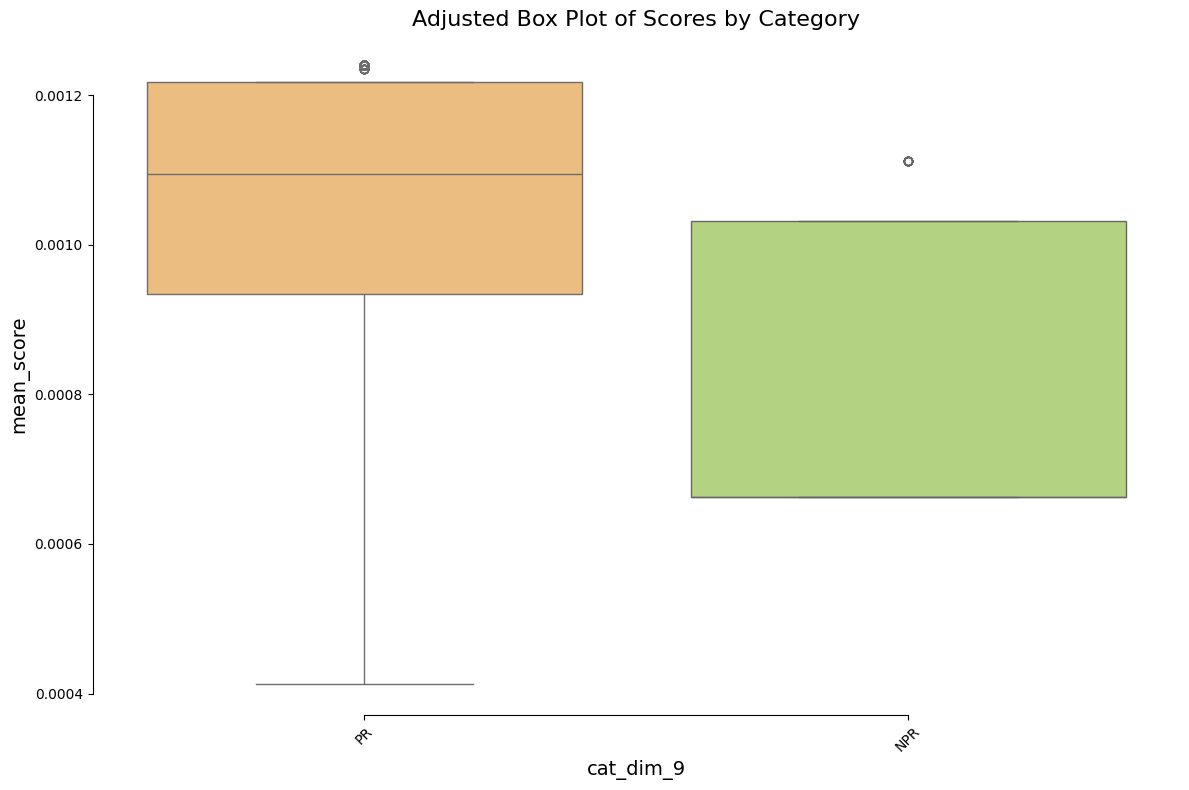

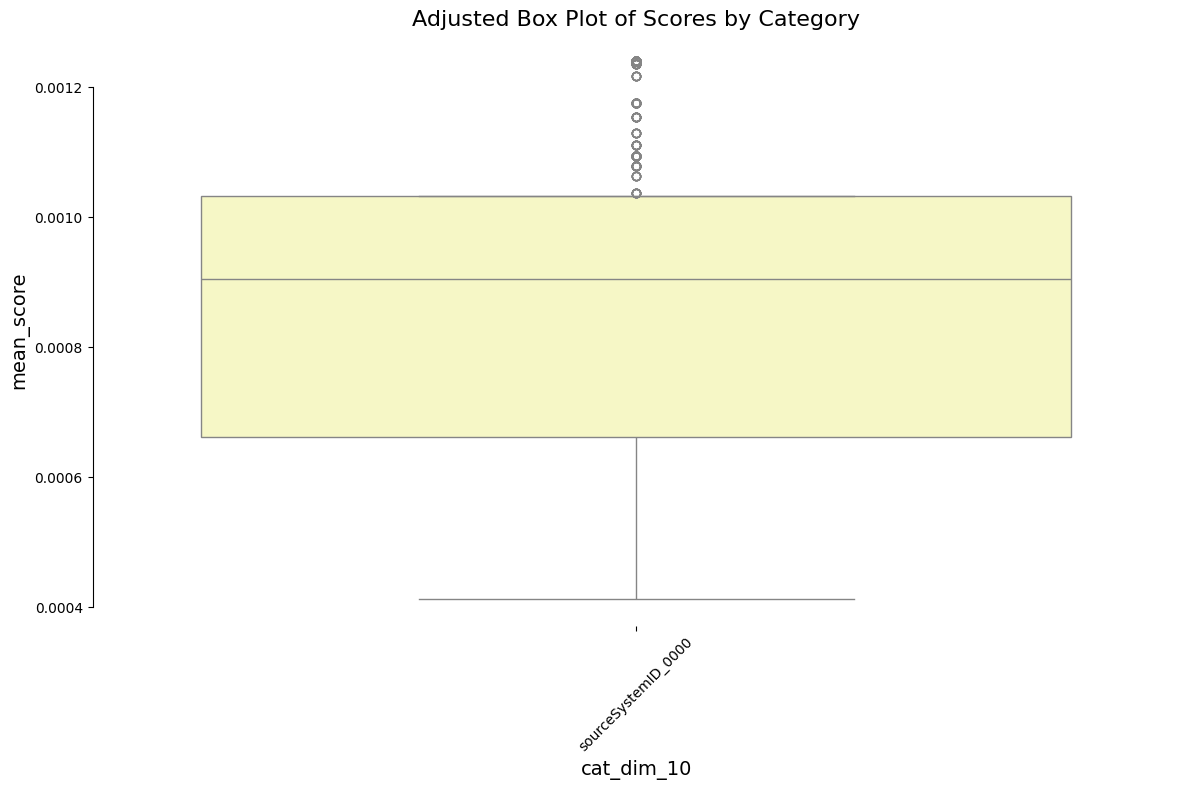

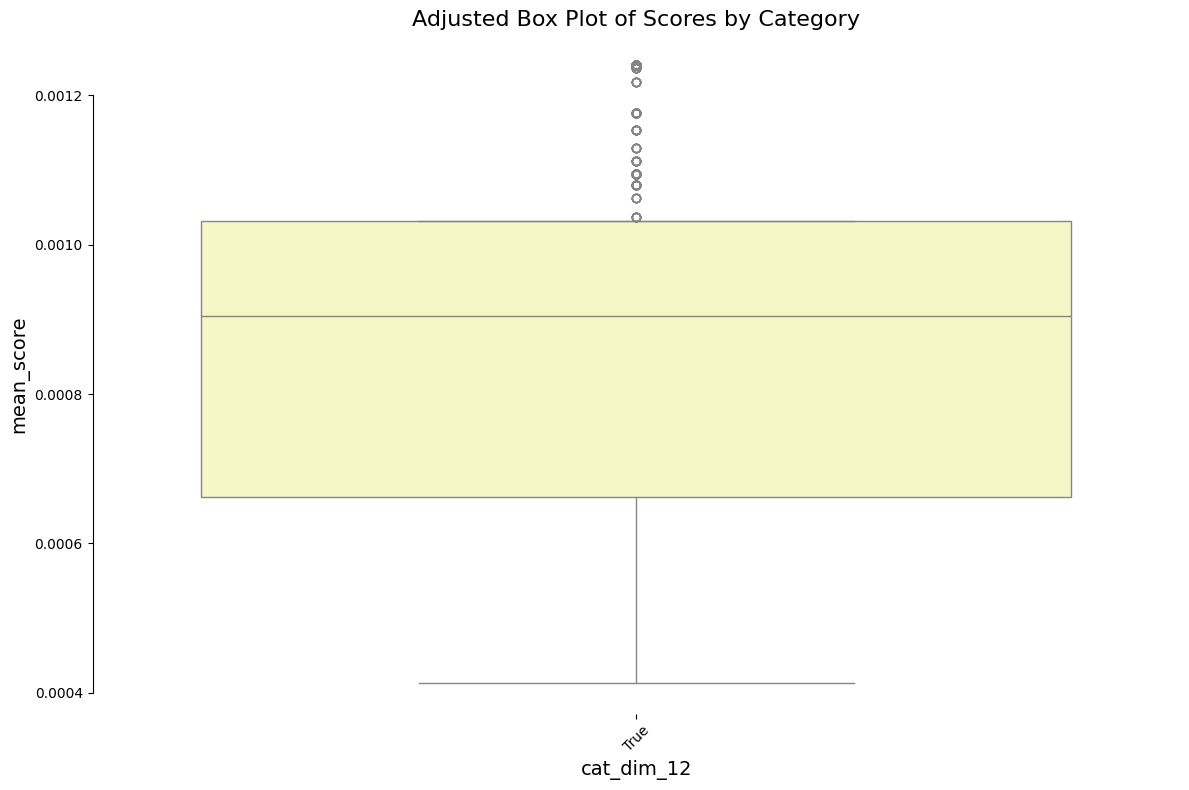

Error: y must be squeezable to a 1-d array for category cat_dim_resource


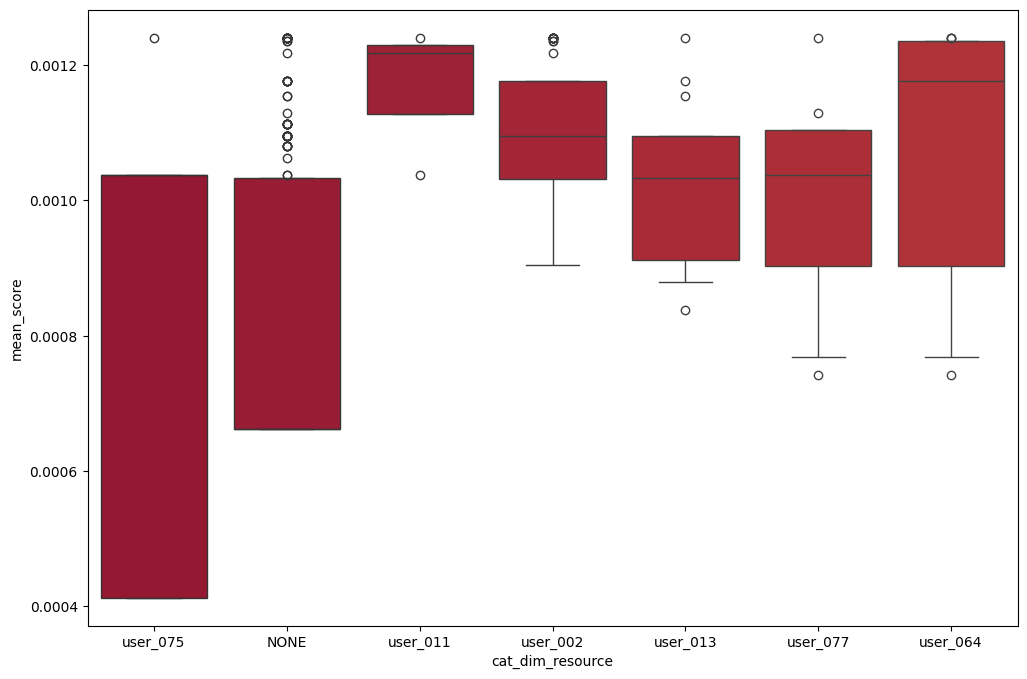

In [13]:
import pandas as pd

def select_high_variability_categories(data):
    """
    Selects categories with high variability for further analysis.
    
    Parameters:
    - data (pd.DataFrame): DataFrame containing the data with a column named 'cat_dim_5' for categories.

    Returns:
    - pd.DataFrame: Filtered DataFrame containing only the selected high variability categories.
    """
    # Define the categories with high variability
    high_variability_categories = ['Additives', 'Logistics', 'Specialty Resins']

    # Filter the data for these categories
    filtered_data = data[data['cat_dim_5'].isin(high_variability_categories)]
    
    return filtered_data

data_high_variability = select_high_variability_categories(data)
cat_high_variability = [col for col in data_high_variability.columns if col.startswith('cat_dim')]


for category_hv in cat_high_variability:
    try:
        analyze_performance(visualize=True, category=category_hv, score='mean_score', method='adjusted', data_filtered=data_high_variability)
    except ValueError as e:
        print(f"Error: {e} for category {category_hv}")


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

def plot_category_scores(data, category_column, score_column='mean_score'):
    """
    Plots boxplot for the selected category and score column with unique colors for each category using a calmer color palette.
    
    Parameters:
    - data (pd.DataFrame): DataFrame containing the data.
    - category_column (str): The category column to plot.
    - score_column (str): The score column to use for plotting.
    """
    plt.figure(figsize=(12, 8))
    # Creating a color palette that can dynamically adjust to the number of categories
    unique_categories = data[category_column].nunique()
    # Using 'muted' palette for calmer colors
    palette = sns.color_palette("muted", unique_categories)
    
    # Plotting with the color palette
    sns.boxplot(x=category_column, y=score_column, data=data, palette=palette)
    plt.title(f'Box Plot of {score_column} by {category_column}')
    plt.xticks(rotation=90)
    plt.xlabel(category_column)
    plt.ylabel(score_column)
    sns.despine(trim=True)
    plt.show()

def interactive_plot(data):
    """
    Creates an interactive plot with a dropdown to select the category column.
    
    Parameters:
    - data (pd.DataFrame): DataFrame containing the data.
    """
    category_columns = [col for col in data.columns if col.startswith('cat_dim')]
    
    dropdown = widgets.Dropdown(
        options=category_columns,
        value=category_columns[0],
        description='Category:',
        disabled=False,
    )
    
    def update_plot(category_column):
        plot_category_scores(data, category_column=category_column)

    interactive_widget = widgets.interactive(update_plot, category_column=dropdown)
    display(interactive_widget)


data_high_variability = select_high_variability_categories(data)  # Assuming 'data' is defined and contains relevant columns
interactive_plot(data_high_variability)


interactive(children=(Dropdown(description='Category:', options=('cat_dim_5', 'cat_dim_4', 'cat_dim_3', 'cat_d…